Выясните, какие пары товаров пользователи чаще всего покупают вместе. По сути, вам необходимо найти паттерны покупок, что позволит оптимизировать размещение продуктов в магазине, для удобства пользователей и увеличения выручки.

Другими словами: 2 раза люди покупали одновременно чай и арбуз, 1 раз одновременно покупали арбуз и сгущёнку и 1 раз одновременно были куплены чай со сгущёнкой.

Напишите код на python для получения нужной таблицы и укажите 5 наиболее распространённых паттернов.

In [17]:
#Импортирую библиотеки
import pandas as pd
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

In [3]:
#Загружаю данные
data = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv')

In [4]:
data.head()

,id,Товар,Количество
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [5]:
#Переименовываю названия столбцов
data = data.rename(columns = {"Товар":"item", "Количество":"amount"})

In [6]:
#Создаю список из список, который содержит все продукты в каждой из покупок
mylist = data.pivot(index = 'id',
          columns = 'item',
          values = 'item').values.tolist()

In [44]:
#Список содержит пустые значения, поэтому исключаю их из списка
mylist = [[i for i in j if i == i] for j in mylist]

In [10]:
#С помощью библиотеки combinations нахожу все пары продуктов в каждой покупке и объединяю их в единый список
total = []
for i in mylist:
    a = (list(combinations(i,2)))
    for b in a:
        total.append(b)

In [26]:
#Формирую датафрейм из списка
patterns = pd.DataFrame(total,columns = ['item_x', 'item_y'])

In [27]:
#Группирую датафрейм, чтобы найти количество комбинаций, которые покупали больше или меньше всего. Сортирую по уменьшению частоты встречания
patterns = patterns\
    .groupby(['item_x', 'item_y'])\
    .agg({'item_x':'count'})\
    .rename(columns = {'item_x':'count'})\
    .sort_values(['count'], ascending = False)\
    .reset_index()

In [28]:
#Пять наиболее распространенных паттернов
patterns.head(5)

,item_x,item_y,count
0,Огурцы Луховицкие,Укроп,431
1,Петрушка,Укроп,408
2,Арбуз,Огурцы Луховицкие,345
3,Кабачки,Огурцы Луховицкие,326
4,Кинза,Укроп,303


In [37]:
patterns['combination'] = patterns['item_x'] + " + " + patterns['item_y'] 

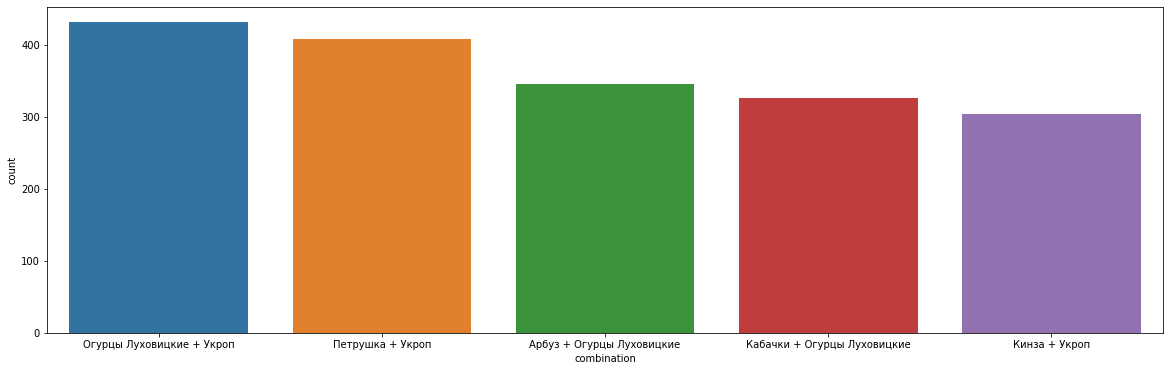

In [43]:
#Пять наиболее распространенных паттернов на графике
plt.figure(figsize = (20,6))
ax = sns.barplot(x='combination', y='count', data = patterns.head(5))